#MACHINE LEARNING -  Forest Cover Prediction  - Group 28

# Importing required packages

In [2]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
import scipy.stats as ss
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

%matplotlib inline
import io
from google.colab import files

warnings.filterwarnings('ignore')
uploaded = files.upload()

Saving covtype with labels.csv to covtype with labels.csv


# Reading the Dataset into DataFrame

In [3]:
data = pd.read_csv('covtype with labels.csv')
print(data)

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
5            2579     132      6                               300   
6            2606      45      7                               270   
7            2605      49      4                               234   
8            2617      45      9                               240   
9            2612      59     10                               247   
10           2612     201      4                               180   
11           2886     151     11                               371   
12           2742     134     22                               150   
13           2609   

# Finding each Cover type count and visualization

In [4]:
type1, type2, type3, type4, type5, type6, type7 = 0, 0, 0, 0, 0, 0, 0
for n in data['Cover_Type']:
    if n == 1:
        type1 = type1+1
    elif n == 2:
        type2 = type2+1
    elif n == 3:
        type3 = type3+1
    elif n == 4:
        type4 = type4+1
    elif n == 5:
        type5 = type5+1
    elif n == 6:
        type6 = type6+1
    else:
        type7 = type7+1
print('Cover type1')
print(type1)
print('Cover type2')
print(type2)
print('Cover type3')
print(type3)
print('Cover type4')
print(type4)
print('Cover type5')
print(type5)
print('Cover type6')
print(type6)
print('Cover type7')
print(type7)
print('\n')

Cover type1
211840
Cover type2
283301
Cover type3
35754
Cover type4
2747
Cover type5
9493
Cover type6
17367
Cover type7
20510




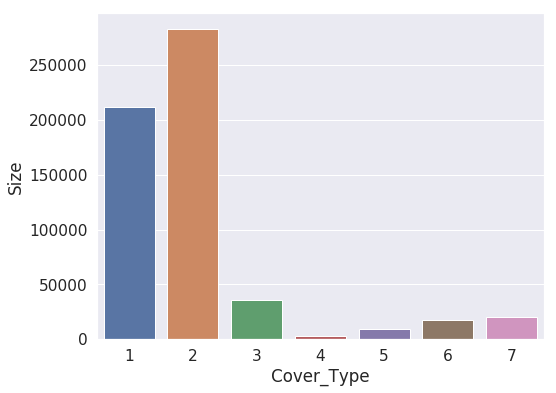

In [0]:
class_dist = data.groupby('Cover_Type').size()
class_label = pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)
plt.show()
#end

In [0]:
#class distribution in percentages
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

# Data Dimensions

In [0]:
print('Data Dimension:')
print('Number of Records:', data.shape[0])
print('Number of Features:', data.shape[1])
print('\n')

In [0]:
print('Feature Names')
print(data.columns)
print('\n')
print(data.index)
print('\n')
print(data.values)
print('\n')
#print(data.to_numpy())
print(data.info())
print('\n')

Feature Names
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'So

# Finding and Visualizing Skew

In [0]:
print(data.isnull().sum())
print('\n')
print(data.describe())

print('\n')
print('Skewness of the below features:')
print(data.skew())

print('\n')

In [0]:
#visualizing skewness
skew = data.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness', data=skew_df)
plt.xticks(rotation=90)
plt.show()
print('\n')

# Differentiating into Continuous and Binary Data

In [4]:
print('Continuous Data')
cont_data = data.iloc[:, :10]
print(cont_data)
print('Soil Data and Wilderness Data')
binary_data =  data.iloc[:, 11:54]
print(binary_data)
print('Wilderness Data')
Wilderness_data = data.iloc[:, 10:14]
print(Wilderness_data)
print('Soil Type Data')
Soil_data = data.iloc[:, 14:54]
print(Soil_data)

Continuous Data
        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
5            2579     132      6                               300   
6            2606      45      7                               270   
7            2605      49      4                               234   
8            2617      45      9                               240   
9            2612      59     10                               247   
10           2612     201      4                               180   
11           2886     151     11                               371   
12           2742     134     22                               150   
13  

# Normalising the data (Pre-Processing)

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(cont_data)
finaldf = pd.DataFrame(x_scaled)
finaldf

# To replace the actual feature values with normalised values
# Commenting as it is just a one time activity

data['Elevation'] = finaldf[0]
data['Aspect'] = finaldf[1]
data['Slope'] = finaldf[2]
data['Horizontal_Distance_To_Hydrology'] = finaldf[3]
data['Vertical_Distance_To_Hydrology'] = finaldf[4]
data['Horizontal_Distance_To_Roadways'] = finaldf[5]
data['Hillshade_9am'] = finaldf[6]
data['Hillshade_Noon'] = finaldf[7]
data['Hillshade_3pm'] = finaldf[8]
data['Horizontal_Distance_To_Fire_Points'] = finaldf[9]
print(data)



        Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0        0.368684  0.141667  0.045455                          0.184681   
1        0.365683  0.155556  0.030303                          0.151754   
2        0.472736  0.386111  0.136364                          0.191840   
3        0.463232  0.430556  0.272727                          0.173228   
4        0.368184  0.125000  0.030303                          0.109520   
5        0.360180  0.366667  0.090909                          0.214746   
6        0.373687  0.125000  0.106061                          0.193271   
7        0.373187  0.136111  0.060606                          0.167502   
8        0.379190  0.125000  0.136364                          0.171797   
9        0.376688  0.163889  0.151515                          0.176807   
10       0.376688  0.558333  0.060606                          0.128848   
11       0.513757  0.419444  0.166667                          0.265569   
12       0.441721  0.3722

# Count of Binary Data (Wilderness and Soil Type)

In [0]:
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

# Finding Features with count less than 1000

In [0]:
print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)

# Plotting Continuous Data

In [0]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    sns.distplot(cont_data[col])

# Plotting Continuous Features with Cover Type(Target variable)

In [0]:
data['Cover_Type']=data['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=data['Cover_Type'], y=col, data=data, palette="coolwarm")

# Plotting Binary Data with Cover Type (Target Variable)

In [0]:
for i, col in enumerate(binary_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=data['Cover_Type'] ,data=data, palette="rainbow")

# Reversing One Hot Encoding of Wilderness and Soil Type (Binary to categoical)

In [0]:
def rev_code(row):
    for c in Soil_data.columns:
        if row[c]==1:
            return c  

data['Soil_Type']=Soil_data.apply(rev_code, axis=1) #Time consuming

def rev_code(row):
    for c in Wilderness_data.columns:
        if row[c]==1:
            return c  

data['Wilderness_Type']=Wilderness_data.apply(rev_code, axis=1) #Time consuming

# Plotting Wilderness Type and Soil Type with Target variable after one hot encoding

In [0]:
plt.figure(figsize=(16,8))
sns.countplot(x='Wilderness_Type', hue='Cover_Type',data=data, palette="rainbow")
plt.xticks(rotation=90)

plt.figure(figsize=(16,8))
sns.countplot(x='Soil_Type', hue='Cover_Type',data=data, palette="rainbow")
plt.xticks(rotation=90)

# Percentage of each soil type with respect to each category of target variable

In [0]:
soil_counts = []
for num in range(1,41):
    col = ('Soil_Type_' + str(num))
    this_soil = data[col].groupby(data['Cover_Type'])
    totals = []
    for value in this_soil.sum():
        totals.append(value)
    total_sum = sum(totals)
    soil_counts.append(total_sum)
    print("Total Trees in Soil Type {0}: {1}".format(num, total_sum))
    percentages = [ (total*100 / total_sum) for total in totals]
    print("{0}\n".format(percentages))
print("Number of trees in each soil type:\n{0}".format(soil_counts))

# Finding Correlation between Continuous Features

In [0]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='cyan',linewidths=1,annot=True)

In [0]:
#g = sns.PairGrid(cont_data)
#g.map(plt.scatter)

# Storing target feature and rest of features in seperate vaiables

In [0]:
X=data.loc[:,'Elevation':'Soil_Type_40']
y=data['Cover_Type']

# Feature Selection (Removing features whose contribution is negligable based on SD and correlation)

In [0]:
rem=['Hillshade_3pm','Soil_Type_7','Soil_Type_8','Soil_Type_14','Soil_Type_15',
     'Soil_Type_21','Soil_Type_25','Soil_Type_28','Soil_Type_36','Soil_Type_37']

X.drop(rem, axis=1, inplace=True)

# Splitting Data into Training and Testing based on Train-Test-Paradigm

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# Initially using the dummy classifier

In [0]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
Accuracy=dummy.score(X_test, y_test)
print('Dummy Classifier Accuracy:',Accuracy)

# Implementing KNN Algorithm 

In [0]:
# trying to find the best value for hyper parameter neighbours from 1 to 6
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


# Plotting KNN of 'test' and 'train' for different neighbors

In [0]:
#Generate plot
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
#plt.show()

# KNN- Finding the accuracy based on the best neighbor

In [0]:
#since we found best neighbour value is 5, calculating rest of metrics based on that value
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
Accuracy=knn.score(X_test,y_test)
Precision  = precision_score(pred, y_test, average='weighted')
Recall = recall_score(pred, y_test, average='weighted')
f1score = f1_score(pred, y_test, average='weighted')
cm = confusion_matrix(pred, y_test)
print('KNN Accuracy:',Accuracy)
print('KNN Precision:',Precision)
print('KNN Recall:',Recall)
print('KNN F1score:',f1score)
print(cm)

KNN Accuracy: 0.9651700477326969
KNN Precision: 0.9654094588824774
KNN Recall: 0.9651700477326969
KNN F1score: 0.9652536941777726


# Confusion matrix for KNN

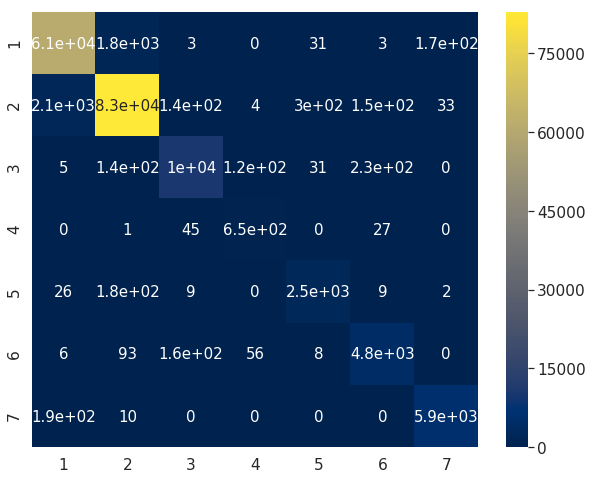

In [0]:
#confusion matrix for knn
cm_df = pd.DataFrame(cm, range(1,8), range(1,8))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

# Running different Classifiers to find the best classifier

In [0]:
classifier_accuracy = []
classifier_precision = []
classifier_recall = []
classifier_f1score = []

Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
     GradientBoostingClassifier()]
X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    classifier_accuracy.append(accuracy_score(pred , y_test))   
    classifier_precision.append(precision_score(pred, y_test, average='weighted'))
    classifier_recall.append(recall_score(pred, y_test, average='weighted'))
    classifier_f1score.append(f1_score(pred, y_test, average='weighted'))
    
    cm = confusion_matrix(pred, y_test) 
    cm_df = pd.DataFrame(cm, range(1,8),range(1,8))
    plt.figure(figsize = (10,8))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})
    
    
d = { "Algorithm" : X, "Accuracy" : classifier_accuracy, "Precision" : classifier_precision, "Recall" : classifier_recall, "F1 score" : classifier_f1score}

dfm = pd.DataFrame(d)
dfm

# Cross-Validation paradigm for different Classifiers

In [9]:
#initially trying out for Random Forest.

classifier = RandomForestClassifier(n_estimators=300, random_state=0)  
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5) 
print(all_accuracies)

print(all_accuracies.mean())
print(all_accuracies.std())


[0.95244944 0.951994   0.95174754 0.95170769 0.95195358]
0.9519704496107556
0.0002641997014197141


In [12]:

#For the rest of the classifiers
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RDF',RandomForestClassifier(n_estimators=300)))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))
# evaluate each model in turn
results = []
names = []
seed = 7
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.713391 (0.002345)
KNN: 0.935600 (0.000899)
CART: 0.932106 (0.001458)
RDF: 0.954805 (0.000810)
NB: 0.129117 (0.004874)
SVM: 0.711292 (0.002198)


In [56]:
print(results)
ss.ttest_ind([0.71687443, 0.71480908, 0.71360429, 0.70939982, 0.71117012,
       0.71171105, 0.7135797 , 0.71500578, 0.71123678, 0.71652324],[0.95593912, 0.95500479, 0.95429176, 0.95640628, 0.95407047,
       0.95362789, 0.95426717, 0.95446387, 0.9549791 , 0.95500369], equal_var=True)


[array([0.71687443, 0.71480908, 0.71360429, 0.70939982, 0.71117012,
       0.71171105, 0.7135797 , 0.71500578, 0.71123678, 0.71652324]), array([0.93673625, 0.93479383, 0.93609697, 0.93685919, 0.93550687,
       0.93415456, 0.93476925, 0.93668707, 0.93513646, 0.9352594 ]), array([0.9350643 , 0.93317106, 0.93095818, 0.93041725, 0.93164663,
       0.93049101, 0.93068771, 0.93255637, 0.93255471, 0.93351365]), array([0.95593912, 0.95500479, 0.95429176, 0.95640628, 0.95407047,
       0.95362789, 0.95426717, 0.95446387, 0.9549791 , 0.95500369]), array([0.12367535, 0.12569152, 0.13432175, 0.12942883, 0.12387205,
       0.13055986, 0.12741265, 0.12490472, 0.13157118, 0.13973445]), array([0.71458779, 0.7131863 , 0.71124388, 0.70789998, 0.71003909,
       0.70866219, 0.71092425, 0.71281749, 0.70944185, 0.7141136 ])]


Ttest_indResult(statistic=-291.98630117534236, pvalue=1.543188986598485e-34)

# Ensemble -  Voting Classifier using test and train paradigm

In [0]:
#Combining KNN and Random Forest for Voting
from sklearn.ensemble import VotingClassifier
model1 = KNeighborsClassifier(n_neighbors=5)
model2 = RandomForestClassifier(n_estimators=300, random_state=0)
ensemble_model = VotingClassifier(estimators=[('KNN', model1), ('RDF', model2)], voting='hard')
ensemble_model.fit(X_train,y_train)
pred_ensemble=ensemble_model.predict(X_test)
print(accuracy_score(pred_ensemble,y_test))

In [0]:
#calculating evaluation metrics and contingency table
Precision  = precision_score(pred_ensemble, y_test, average='weighted')
Recall = recall_score(pred_ensemble, y_test, average='weighted')
f1score = f1_score(pred_ensemble, y_test, average='weighted')
cm = confusion_matrix(pred_ensemble, y_test)
print('Voting Precision:',Precision)
print('Voting Recall:',Recall)
print('Voting F1score:',f1score)
print(cm)

cm_df = pd.DataFrame(cm, range(1,8), range(1,8))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

# Ensemble -  Bagging Classifier using test train paradigm

In [0]:
#Using Decision Tree, as it the best model that can be used with Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)
pred_bagging=model.predict(X_test)
print(accuracy_score(pred_bagging,y_test))

In [0]:
##calculating evaluation metrics and contingency table
Precision  = precision_score(pred_bagging, y_test, average='weighted')
Recall = recall_score(pred_bagging, y_test, average='weighted')
f1score = f1_score(pred_bagging, y_test, average='weighted')
cm = confusion_matrix(pred_bagging, y_test)
print('Bagging Precision:',Precision)
print('Bagging Recall:',Recall)
print('Bagging F1score:',f1score)
print(cm)

cm_df = pd.DataFrame(cm, range(1,8), range(1,8))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

In [0]:
#print(y_train.value_counts())

# Over sampling to take care of Class Imbalance (SMOTE Technique) and applying KNN! and rest of the algorithms (data from test and train paradigm)

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

X_sm_df=pd.DataFrame(X_sm)
print(X_sm_df.index)

RangeIndex(start=0, stop=603098, step=1)


In [13]:
#Initially trying out KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm,y_sm)
pred = knn.predict(X_test)
Accuracy=knn.score(X_test,y_test)
Precision  = precision_score(pred, y_test, average='weighted')
Recall = recall_score(pred, y_test, average='weighted')
f1score = f1_score(pred, y_test, average='weighted')
cm = confusion_matrix(pred, y_test)
print('KNN Accuracy:',Accuracy)
print('KNN Precision:',Precision)
print('KNN Recall:',Recall)
print('KNN F1score:',f1score)
print(cm)



KNN Accuracy: 0.936346842298513
KNN Precision: 0.9368403970760473
KNN Recall: 0.936346842298513
KNN F1score: 0.9362058129631505
[[59235  3275     4     0    69    18   329]
 [ 3816 80977   223     0   476   239    56]
 [    8   199  9794    29    38   426     0]
 [    0    11   372   791     0   166     0]
 [   40   326    30     0  2273    16     2]
 [   10   173   399     9    14  4384     0]
 [  290    32     0     0     0     0  5755]]


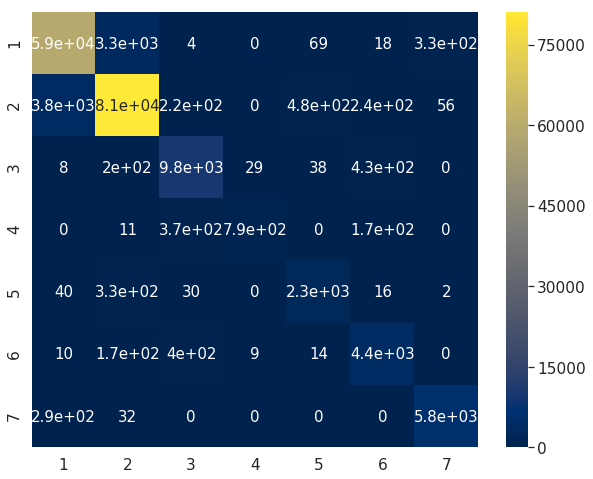

In [15]:
cm_df = pd.DataFrame(cm, range(1,8), range(1,8))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

,Algorithm,Accuracy,Precision,Recall,F1 score
0,LinearSVC,0.686657,0.740545,0.686657,0.696074
1,DecisionTreeClassifier,0.934924,0.934913,0.934924,0.934893
2,LogisticRegression,0.690747,0.740431,0.690747,0.699894
3,GaussianNB,0.127117,0.755933,0.127117,0.132362
4,RandomForestClassifier,0.942118,0.943419,0.942118,0.942467
5,GradientBoostingClassifier,0.759730,0.777166,0.759730,0.763381


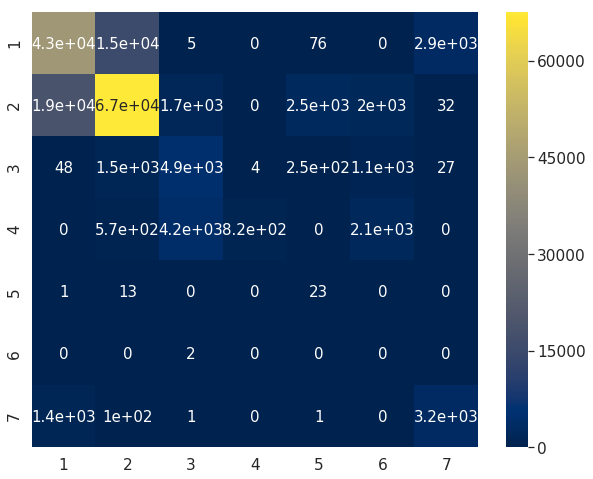

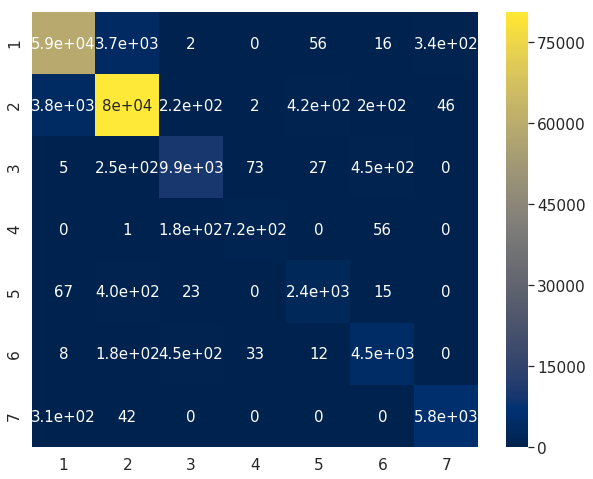

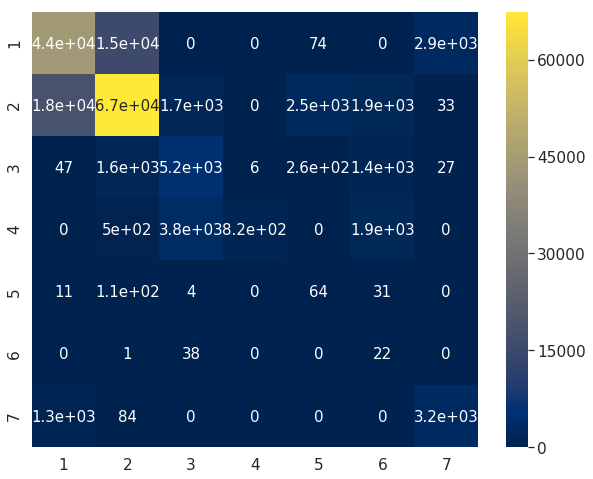

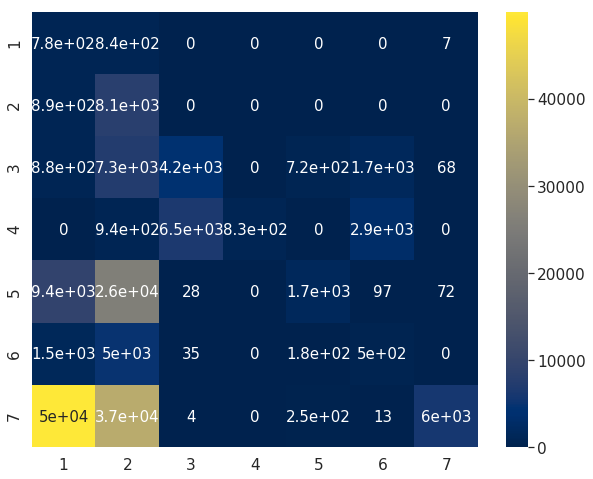

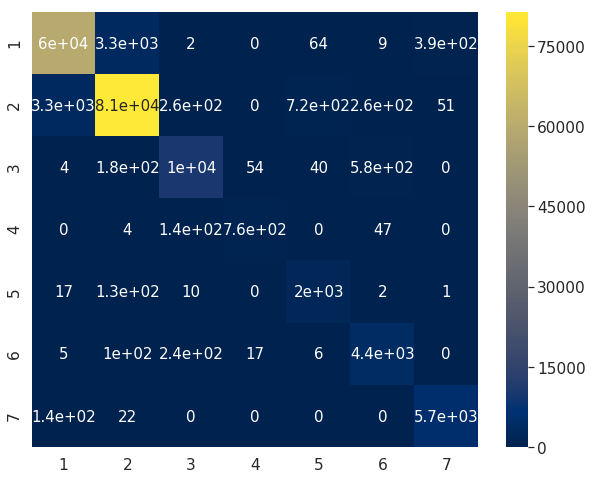

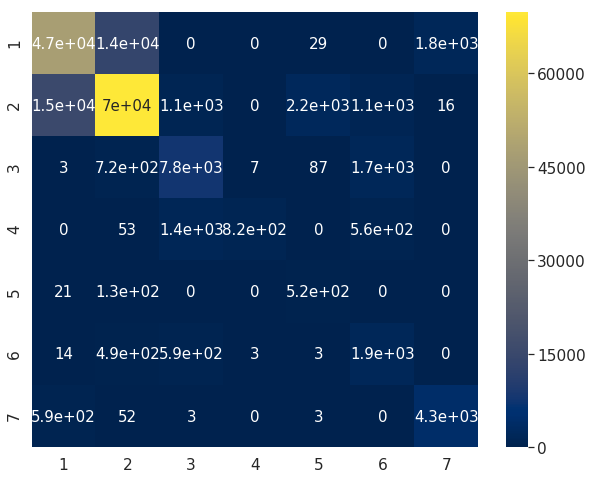

In [9]:
#trying out rest of the classifiers
classifier_accuracy = []
classifier_precision = []
classifier_recall = []
classifier_f1score = []

Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
     GradientBoostingClassifier()]
X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_sm , y_sm )
    pred = model.predict(X_test)
    classifier_accuracy.append(accuracy_score(pred , y_test))   
    classifier_precision.append(precision_score(pred, y_test, average='weighted'))
    classifier_recall.append(recall_score(pred, y_test, average='weighted'))
    classifier_f1score.append(f1_score(pred, y_test, average='weighted'))
    
    cm = confusion_matrix(pred, y_test)
    cm_df = pd.DataFrame(cm, range(1,8),range(1,8))
    plt.figure(figsize = (10,8))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})
    
    
d = { "Algorithm" : X, "Accuracy" : classifier_accuracy, "Precision" : classifier_precision, "Recall" : classifier_recall, "F1 score" : classifier_f1score}

dfm = pd.DataFrame(d)
dfm

# Under sampling to take care of Class Imbalance (RandomUnderSampler Technique) and applying KNN (data from test and train paradigm)

In [0]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)
#print('Removed indexes:', id_rus)

X_rus_df=pd.DataFrame(X_rus)
print(X_rus_df.index)

RangeIndex(start=0, stop=19229, step=1)


In [0]:
#Initially trying out KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_rus,y_rus)
pred = knn.predict(X_test)
Accuracy=knn.score(X_test,y_test)
Precision  = precision_score(pred, y_test, average='weighted')
Recall = recall_score(pred, y_test, average='weighted')
f1score = f1_score(pred, y_test, average='weighted')
cm = confusion_matrix(pred, y_test)
print('KNN Accuracy:',Accuracy)
print('KNN Precision:',Precision)
print('KNN Recall:',Recall)
print('KNN F1score:',f1score)
print(cm)

cm_df = pd.DataFrame(cm, range(1,8), range(1,8))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

In [0]:
#rest of the classifers
classifier_accuracy = []
classifier_precision = []
classifier_recall = []
classifier_f1score = []

Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
     GradientBoostingClassifier()]
X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_rus , y_rus )
    pred = model.predict(X_test)
    classifier_accuracy.append(accuracy_score(pred , y_test))   
    classifier_precision.append(precision_score(pred, y_test, average='weighted'))
    classifier_recall.append(recall_score(pred, y_test, average='weighted'))
    classifier_f1score.append(f1_score(pred, y_test, average='weighted'))
    
    cm = confusion_matrix(pred, y_test)
    cm_df = pd.DataFrame(cm, range(1,8),range(1,8))
    plt.figure(figsize = (10,8))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})
    
    
d = { "Algorithm" : X, "Accuracy" : classifier_accuracy, "Precision" : classifier_precision, "Recall" : classifier_recall, "F1 score" : classifier_f1score}

dfm = pd.DataFrame(d)
dfm

# Rule Based

In [0]:
#Tried using the orange package, later used apriori using different methods
!pip install -q Orange3
pip install orange3


import Orange
cn2_classifier = Orange.classification.rules.CN2Learner('covtype with labels.csv')

for r in cn2_classifier.base_rules:
    print (Orange.classification.rules.rule_to_string(r))

# Grid Search (Requies huge processing power, process getting halted in middle)

In [0]:
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import GridSearchCV

# def grid_search():
#     pipeline1 = Pipeline((
#     ('clf', RandomForestClassifier()),
#     ))

#     parameters1 = {
#     'clf__n_estimators': [300,600,1000]
#     }
    
#     pars = [parameters1]
#     pips = [pipeline1]

#     print("starting Gridsearch")
#     for i in range(len(pars)):
#         gs = GridSearchCV(pips[i], pars[i], n_jobs=-1)
#         gs = gs.fit(X_train, y_train)
#         print("finished Gridsearch")
#         print(gs.best_score_)
#grid_search() 

# Log transfoming data to tackle skewed data (checking out if by applying log transformation, were we able to reduce skew)

In [0]:
# data['Elevation'] = np.log(finaldf[0])
# data['Aspect'] = np.log(finaldf[1])
# data['Slope'] = np.log(finaldf[2])
# data['Horizontal_Distance_To_Hydrology'] = np.log(finaldf[3])
# data['Vertical_Distance_To_Hydrology'] = np.log(finaldf[4])
# data['Horizontal_Distance_To_Roadways'] = np.log(finaldf[5])
# data['Hillshade_9am'] = np.log(finaldf[6])
# data['Hillshade_Noon'] = np.log(finaldf[7])
# data['Hillshade_3pm'] = np.log(finaldf[8])
# data['Horizontal_Distance_To_Fire_Points'] = np.log(finaldf[9])
# print(data)

# Visualizing skew of Raw data, over sampled and under sampled data

In [0]:
skew = data.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness', data=skew_df)
plt.xticks(rotation=90)
plt.show()
print('\n')

In [0]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

#Below code SMOTES and then finds skew on smoted data. We convert back and forth between np array and data set for visualization sake.
smote_df = pd.DataFrame(X_sm, columns = X.columns)

cont_df = smote_df.iloc[:, :10]

skew = cont_df.skew()

skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness', data=skew_df)
plt.xticks(rotation=90)
plt.show()
print('\n')

In [0]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

undersampled_df = pd.DataFrame(X_sm, columns = X.columns)

cont_df = undersampled_df.iloc[:, :10]

skew = cont_df.skew()

skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness', data=skew_df)
plt.xticks(rotation=90)
plt.show()